Import the Libraries

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats
import pylab
import datetime
import seaborn as sns
sns.set()

#time series Libraries
import statsmodels.graphics.tsaplots as sgt 
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 

Import the data 

In [2]:
raw_csv_data = pd.read_csv("sentech_data.csv")

Make a copy of original data

In [3]:
sentech_data= raw_csv_data.copy()

In [4]:
sentech_data.head()

,Date,Air_temp,RH,DewPoint,Rain,Pressure,Efield,Lightning_Warnings,Reset_secs
0,2/27/2022 23:45,15.31052,85.83740,12.96685,0.0,827.4857,-16.63182,0,0
1,2/27/2022 23:30,15.98598,82.16581,12.96026,0.0,827.4928,-17.88704,0,0
2,2/27/2022 23:15,15.81320,81.01760,12.57665,0.0,827.6407,-17.25920,0,0
3,2/27/2022 23:00,15.94644,79.59342,12.43628,0.0,827.6857,-15.37659,0,0
4,2/27/2022 22:45,16.28638,76.22140,12.10798,0.0,827.9321,-14.43517,0,0


Load simple static parameters

In [5]:
sentech_data.isna().sum()

#No NaNs

Date                  0
Air_temp              0
RH                    0
DewPoint              0
Rain                  0
Pressure              0
Efield                0
Lightning_Warnings    0
Reset_secs            0
dtype: int64

In [6]:
sentech_data.describe()

,Air_temp,RH,DewPoint,Rain,Pressure,Efield,Lightning_Warnings,Reset_secs
count,11410.000000,11410.000000,11410.000000,11410.000000,11410.000000,11410.000000,11410.000000,11410.000000
mean,18.689568,72.150754,12.816222,0.000035,826.438567,-19.921106,0.108589,314.438212
std,3.924400,20.393162,3.102967,0.002648,15.626958,236.783167,0.311136,965.151379
min,0.000000,0.000000,-3.143647,0.000000,0.000000,-2523.927000,0.000000,0.000000
25%,15.754948,57.802200,11.778005,0.000000,825.406050,-41.416790,0.000000,0.000000
50%,18.324115,74.139575,13.451890,0.000000,826.824550,-29.796630,0.000000,0.000000
75%,21.584875,89.270905,14.794128,0.000000,828.125875,-19.456090,0.000000,0.000000
max,29.734370,99.980700,19.050590,0.200000,833.690200,2562.246000,1.000000,3600.000000


Visualize the data

<AxesSubplot:title={'center':'Electric Field'}>

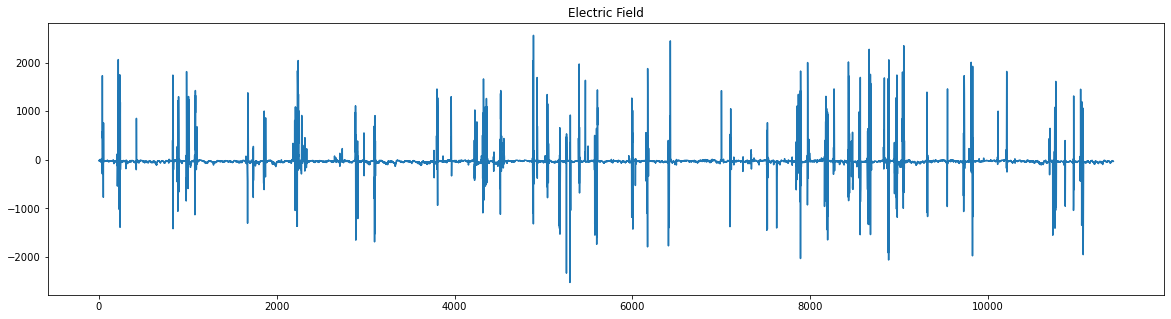

In [7]:
sentech_data.Efield.plot(figsize= (20,5), title= "Electric Field")

<AxesSubplot:title={'center':'Lightning Warnings'}>

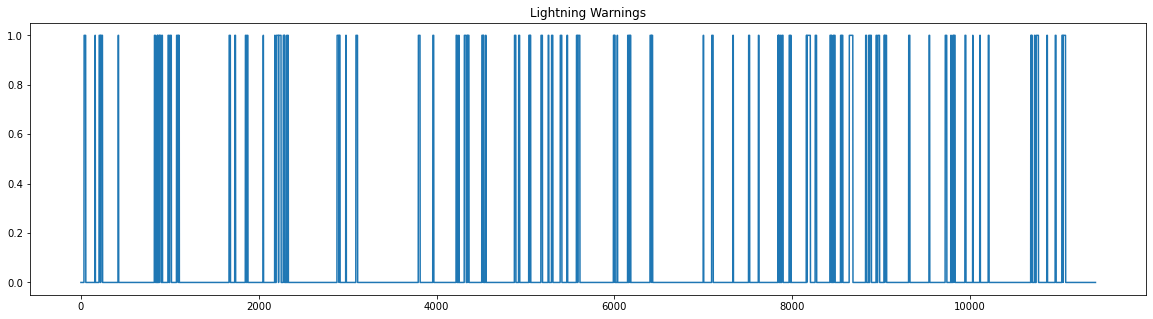

In [8]:
sentech_data.Lightning_Warnings.plot(figsize= (20,5), title= "Lightning Warnings")

Text(0.5, 1.0, 'Electric field vs Lightning Warnings')

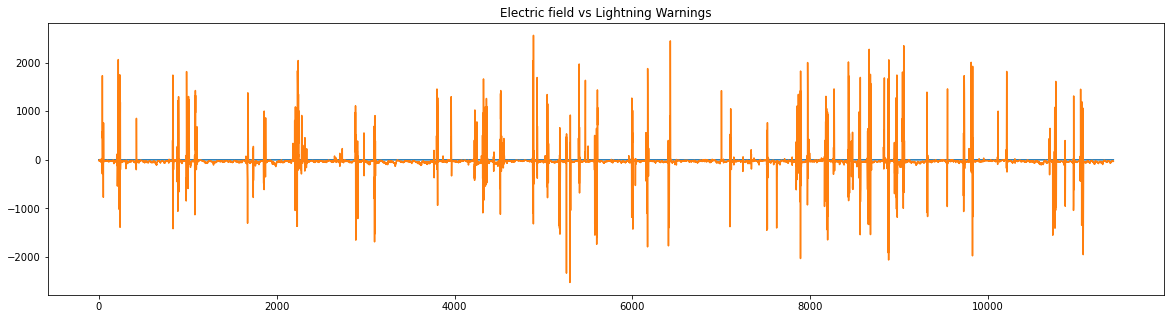

In [9]:
sentech_data.Lightning_Warnings.plot(figsize= (20,5), title= "Lightning Warnings")
sentech_data.Efield.plot(figsize= (20,5), title= "Electric Field")
plt.title("Electric field vs Lightning Warnings")

<AxesSubplot:title={'center':'Air temperature'}>

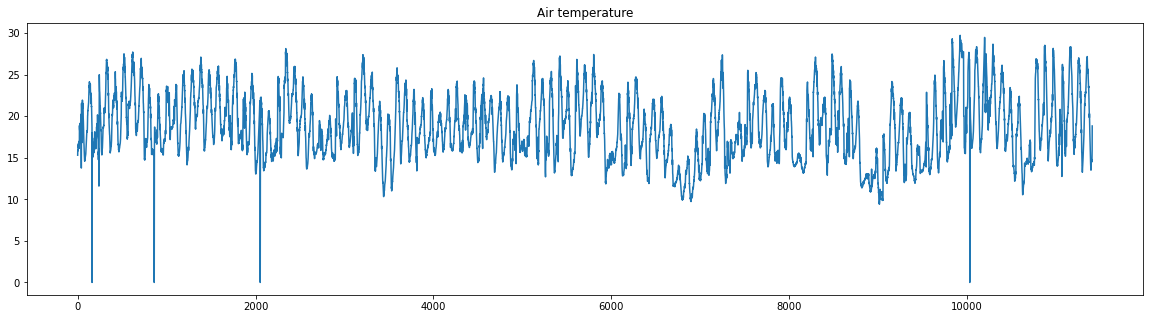

In [10]:
sentech_data.Air_temp.plot(figsize= (20,5), title= "Air temperature")

<AxesSubplot:title={'center':'Relative Humidity'}>

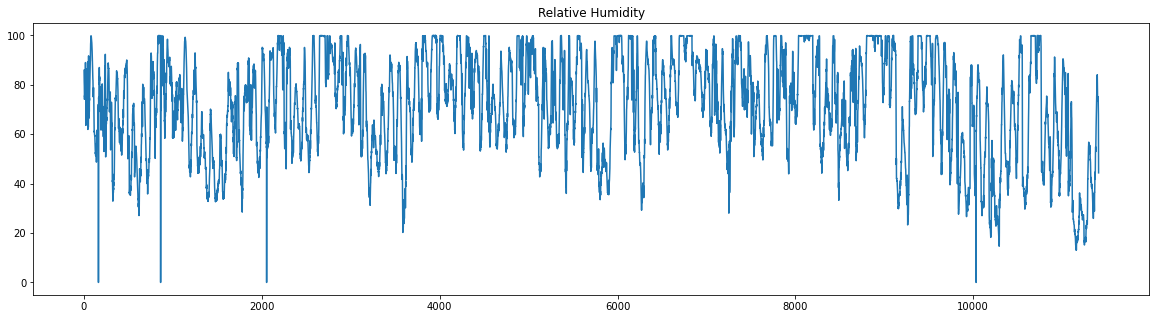

In [11]:
sentech_data.RH.plot(figsize= (20,5), title= "Relative Humidity")

<AxesSubplot:title={'center':'Dew Point'}>

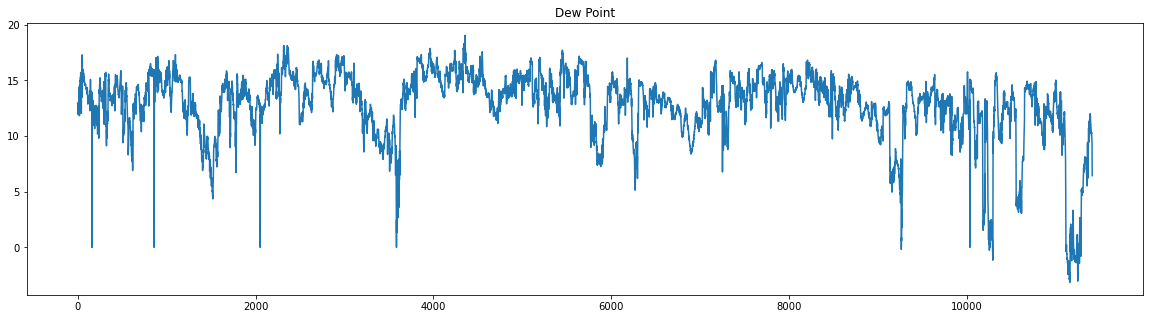

In [12]:
sentech_data.DewPoint.plot(figsize= (20,5), title= "Dew Point")

<AxesSubplot:title={'center':'Rain'}>

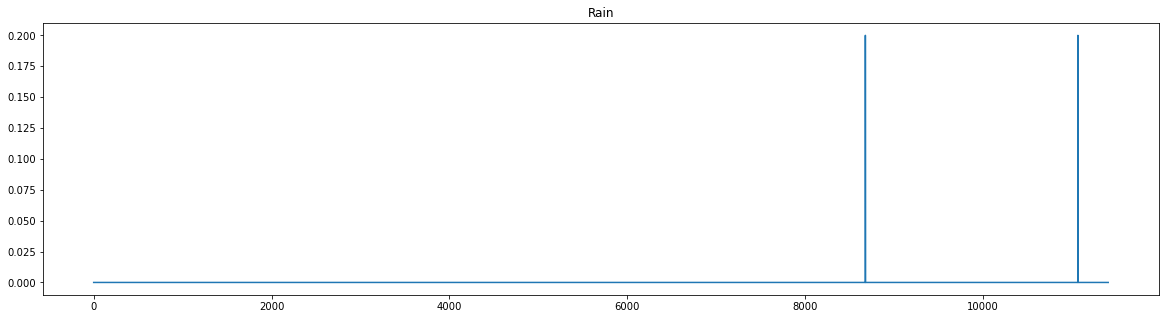

In [13]:
sentech_data.Rain.plot(figsize= (20,5), title= "Rain")

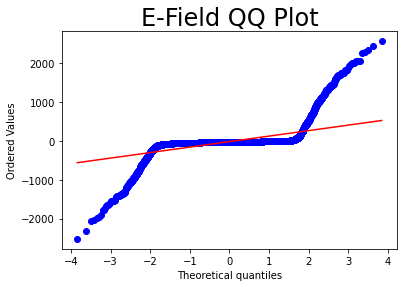

In [14]:
scipy.stats.probplot(sentech_data.Efield, plot = pylab)
plt.title("E-Field QQ Plot", size = 24)
pylab.show()

Converting the date to date object

In [15]:
sentech_data.Date.describe()

count               11410
unique              11410
top       2/27/2022 23:45
freq                    1
Name: Date, dtype: object

In [16]:
sentech_data.Date = pd.to_datetime(sentech_data.Date, dayfirst = True)

In [17]:
sentech_data.Date.describe(datetime_is_numeric=True)

count                            11410
mean     2021-12-30 05:55:59.500438272
min                2021-01-11 00:00:00
25%                2021-11-20 20:33:45
50%                2021-12-30 13:37:30
75%                2022-02-18 06:41:15
max                2022-12-02 23:45:00
Name: Date, dtype: object

In [18]:
sentech_data.set_index("Date", inplace=True)

In [19]:
sentech_data.head()

,Air_temp,RH,DewPoint,Rain,Pressure,Efield,Lightning_Warnings,Reset_secs
Date,,,,,,,,
2022-02-27 23:45:00,15.31052,85.83740,12.96685,0.0,827.4857,-16.63182,0,0
2022-02-27 23:30:00,15.98598,82.16581,12.96026,0.0,827.4928,-17.88704,0,0
2022-02-27 23:15:00,15.81320,81.01760,12.57665,0.0,827.6407,-17.25920,0,0
2022-02-27 23:00:00,15.94644,79.59342,12.43628,0.0,827.6857,-15.37659,0,0
2022-02-27 22:45:00,16.28638,76.22140,12.10798,0.0,827.9321,-14.43517,0,0


Setting the desired frequency (15 min intervals)

In [20]:
#sentech_data=sentech_data.asfreq('900s')

#It is tricky using this function because it flips the datapoints and thus creates >50 000 NaN values. Its unacceptable.

In [21]:
#sentech_data.head()

Handling Missing Values

In [24]:
#sentech_data.isna()

In [25]:
#sentech_data.isna().sum()
#Sum of NaN values is the same as before setting the frequency.

Simplifying the Dataset- Getting rid of extra columns

In [26]:
# Create a new column extracted from sentech tower
sentech_data['electric_field']=sentech_data.Efield

In [29]:
#Summary statistics
sentech_data.describe()

,Air_temp,RH,DewPoint,Rain,Pressure,Efield,Lightning_Warnings,Reset_secs,electric_field
count,11410.000000,11410.000000,11410.000000,11410.000000,11410.000000,11410.000000,11410.000000,11410.000000,11410.000000
mean,18.689568,72.150754,12.816222,0.000035,826.438567,-19.921106,0.108589,314.438212,-19.921106
std,3.924400,20.393162,3.102967,0.002648,15.626958,236.783167,0.311136,965.151379,236.783167
min,0.000000,0.000000,-3.143647,0.000000,0.000000,-2523.927000,0.000000,0.000000,-2523.927000
25%,15.754948,57.802200,11.778005,0.000000,825.406050,-41.416790,0.000000,0.000000,-41.416790
50%,18.324115,74.139575,13.451890,0.000000,826.824550,-29.796630,0.000000,0.000000,-29.796630
75%,21.584875,89.270905,14.794128,0.000000,828.125875,-19.456090,0.000000,0.000000,-19.456090
max,29.734370,99.980700,19.050590,0.200000,833.690200,2562.246000,1.000000,3600.000000,2562.246000


In [31]:
#Delete the other columns
del sentech_data['Air_temp']
del sentech_data['RH']
del sentech_data['DewPoint']
del sentech_data['Rain']
del sentech_data['Pressure']
del sentech_data['Efield']
del sentech_data['Lightning_Warnings']
del sentech_data['Reset_secs']


In [32]:
sentech_data.describe()

,electric_field
count,11410.000000
mean,-19.921106
std,236.783167
min,-2523.927000
25%,-41.416790
50%,-29.796630
75%,-19.456090
max,2562.246000


Splitting the data set

In [35]:
#Determine the size of 80% in total data set
size_total = int(len(sentech_data))

In [36]:
#Determine the size of 80% in total data set
size_train = int(len(sentech_data)*0.8)

In [41]:
df_test = sentech_data.iloc[:(size_total- size)]

In [52]:
df_train = sentech_data.iloc[(size_total- size):]

In [57]:
#Reverse the test set to begin with late date to most recent date
new_df_test= df_test.iloc[::-1]

In [60]:
#Reverse train set to begin with most late date
new_df_train= df_train.iloc[::-1]

In [63]:
new_df_train.tail()

,electric_field
Date,
2022-04-02 04:15:00,43.3055
2022-04-02 04:30:00,517.7832
2022-04-02 04:45:00,701.3608
2022-04-02 05:00:00,717.6788
2022-04-02 05:15:00,913.4950


In [64]:
new_df_test.head()

,electric_field
Date,
2022-04-02 05:30:00,731.48640
2022-04-02 05:45:00,126.14330
2022-04-02 06:00:00,-289.00180
2022-04-02 06:15:00,-289.32950
2022-04-02 06:30:00,-25.41789


COrrelations

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

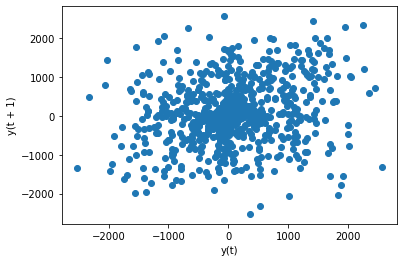

In [76]:
# lagplot
pd.plotting.lag_plot(new_df_train.electric_field, lag=1)

In [77]:
#Correlation Matrix
# using shift function to shift the values.
values= pd.DataFrame(new_df_train.electric_field)

dataframe = pd.concat([values.shift(3), values.shift(2),
                       values.shift(1), values], axis=1)
# naming the columns
dataframe.columns = ['t', 't+1', 't+2', 't+3']
 
# using corr() function to compute the correlation
result = dataframe.corr()
 
print(result)

            t       t+1       t+2       t+3
t    1.000000  0.237626  0.050419  0.098179
t+1  0.237626  1.000000  0.238424  0.051673
t+2  0.050419  0.238424  1.000000  0.239445
t+3  0.098179  0.051673  0.239445  1.000000


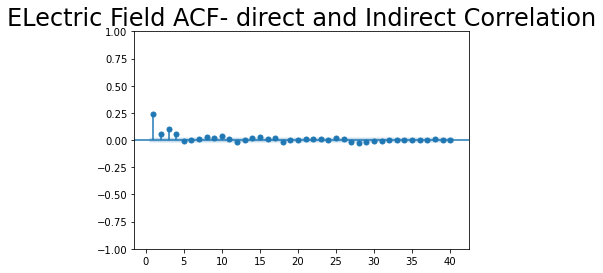

In [87]:
sgt.plot_acf(new_df_train.electric_field, lags= 40, zero= False)
plt.title("ELectric Field ACF- direct and Indirect Correlation", size=24)
plt.show()

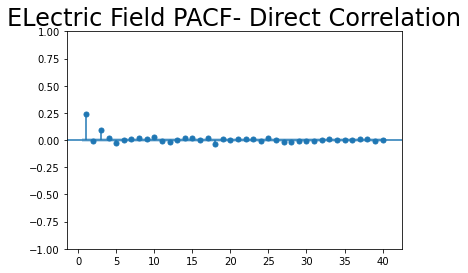

In [88]:
sgt.plot_pacf(new_df_train.electric_field, lags= 40, zero= False, method= ('ols'))
plt.title("ELectric Field PACF- Direct Correlation", size=24)
plt.show()

AR(1) Model

In [105]:
model_ar = ARIMA(new_df_train.electric_field, order=(1,0,0))

C:\Users\Oratile\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Oratile\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Oratile\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Oratile\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Oratile\anaconda3

In [106]:
results_ar = model_ar.fit()

In [107]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         electric_field   No. Observations:                 9128
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -62594.886
Date:                Tue, 04 Oct 2022   AIC                         125195.772
Time:                        13:02:12   BIC                         125217.129
Sample:                             0   HQIC                        125203.034
                               - 9128                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.2148      3.293     -6.746      0.000     -28.669     -15.760
ar.L1          0.2396      0.002     97.261      0.000       0.235       0.244
sigma2      5.295e+04    181.466    291.802      0.000    5.26e+04    5.33e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):            539974.07
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                             0.97
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [110]:
model_ar_2 = ARIMA(new_df_train.electric_field, order=(2,0,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

C:\Users\Oratile\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Oratile\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Oratile\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Oratile\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Oratile\anaconda3

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         electric_field   No. Observations:                 9128
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -62594.735
Date:                Tue, 04 Oct 2022   AIC                         125197.471
Time:                        13:09:34   BIC                         125225.947
Sample:                             0   HQIC                        125207.154
                               - 9128                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.2148      3.334     -6.664      0.000     -28.749     -15.681
ar.L1          0.2410      0.003     95.875      0.000       0.236       0.246
ar.L2         -0.0057      0.003     -2.001      0.045      -0.011      -0.000
sigma2      5.296e+04    181.663    291.507      0.000    5.26e+04    5.33e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            540120.81
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                             0.98
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [111]:
model_ar_3 = ARIMA(new_df_train.electric_field, order=(3,0,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

C:\Users\Oratile\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Oratile\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Oratile\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Oratile\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Oratile\anaconda3

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         electric_field   No. Observations:                 9128
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -62555.377
Date:                Tue, 04 Oct 2022   AIC                         125120.754
Time:                        13:12:27   BIC                         125156.350
Sample:                             0   HQIC                        125132.858
                               - 9128                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.2148      3.657     -6.074      0.000     -29.383     -15.047
ar.L1          0.2416      0.003     95.162      0.000       0.237       0.247
ar.L2         -0.0279      0.003     -9.577      0.000      -0.034      -0.022
ar.L3          0.0928      0.003     31.212      0.000       0.087       0.099
sigma2      5.251e+04    182.114    288.320      0.000    5.22e+04    5.29e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):            522651.22
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                             0.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [112]:
model_ar_4 = ARIMA(new_df_train.electric_field, order=[4,0,0])
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

C:\Users\Oratile\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Oratile\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Oratile\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Oratile\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Oratile\anaconda3

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         electric_field   No. Observations:                 9128
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -62554.072
Date:                Tue, 04 Oct 2022   AIC                         125120.144
Time:                        13:13:52   BIC                         125162.859
Sample:                             0   HQIC                        125134.668
                               - 9128                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.2148      3.720     -5.971      0.000     -29.507     -14.923
ar.L1          0.2401      0.003     94.240      0.000       0.235       0.245
ar.L2         -0.0274      0.003     -9.396      0.000      -0.033      -0.022
ar.L3          0.0887      0.003     29.282      0.000       0.083       0.095
ar.L4          0.0169      0.004      4.818      0.000       0.010       0.024
sigma2       5.25e+04    182.257    288.042      0.000    5.21e+04    5.29e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            525086.30
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                             0.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [114]:
model_ar_5 = ARIMA, order=[5,0,0])
results_ar_5 = model_ar_5.fit()
results_ar_5.summary()

C:\Users\Oratile\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Oratile\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Oratile\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Oratile\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Oratile\anaconda3

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         electric_field   No. Observations:                 9128
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -62549.974
Date:                Tue, 04 Oct 2022   AIC                         125113.947
Time:                        13:15:12   BIC                         125163.781
Sample:                             0   HQIC                        125130.892
                               - 9128                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.2148      3.643     -6.098      0.000     -29.355     -15.075
ar.L1          0.2406      0.003     94.295      0.000       0.236       0.246
ar.L2         -0.0248      0.003     -8.476      0.000      -0.031      -0.019
ar.L3          0.0879      0.003     28.850      0.000       0.082       0.094
ar.L4          0.0241      0.004      6.626      0.000       0.017       0.031
ar.L5         -0.0300      0.004     -8.025      0.000      -0.037      -0.023
sigma2      5.246e+04    182.423    287.555      0.000    5.21e+04    5.28e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            525541.90
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                             0.99
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

LRR Test

In [115]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [116]:
LLR_test(model_ar_2, model_ar_3)

0.0

In [117]:
LLR_test(model_ar_3, model_ar_4)

0.106

In [120]:
model_ar_4 = ARIMA(new_df_train.electric_field, order=[5,0,0])
results_ar_4 = model_ar_4.fit()
print(results_ar_4.summary()) 
print ("LLR test: " + str(LLR_test(model_ar_3, model_ar_4)))

C:\Users\Oratile\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Oratile\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Oratile\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Oratile\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Oratile\anaconda3

                               SARIMAX Results                                
Dep. Variable:         electric_field   No. Observations:                 9128
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -62549.974
Date:                Tue, 04 Oct 2022   AIC                         125113.947
Time:                        14:34:25   BIC                         125163.781
Sample:                             0   HQIC                        125130.892
                               - 9128                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.2148      3.643     -6.098      0.000     -29.355     -15.075
ar.L1          0.2406      0.003     94.295      0.000       0.236       0.246
ar.L2         -0.0248      0.003     -8.476      0.0

DF Test

In [121]:
sts.adfuller(new_df_train.electric_field)

(-20.96732871593101,
 0.0,
 17,
 9110,
 {'1%': -3.4310680179525437,
  '5%': -2.8618573178097093,
  '10%': -2.566938903220909},
 124602.48743793053)

Normalization

In [123]:
benchmark = new_df_train.electric_field.iloc[0]

In [125]:
new_df_train['norm'] =new_df_train.electric_field.div(benchmark).mul(100)

C:\Users\Oratile\AppData\Local\Temp\ipykernel_25704\325599701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_train['norm'] =new_df_train.electric_field.div(benchmark).mul(100)


In [126]:
sts.adfuller(new_df_train.norm)

(-20.96732871593101,
 0.0,
 17,
 9110,
 {'1%': -3.4310680179525437,
  '5%': -2.8618573178097093,
  '10%': -2.566938903220909},
 145492.9651386518)

Analysing the Eroors

In [131]:
new_df_train['res_ret'] = results_ar.resid

C:\Users\Oratile\AppData\Local\Temp\ipykernel_25704\2766162054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_train['res_ret'] = results_ar.resid


In [132]:
new_df_train.res_ret.mean()

0.02456478075275231

In [133]:
new_df_train.res_ret.var()

52952.154987653295

In [134]:
sts.adfuller(new_df_train.res_ret)

(-21.129511990476047,
 0.0,
 17,
 9110,
 {'1%': -3.4310680179525437,
  '5%': -2.8618573178097093,
  '10%': -2.566938903220909},
 124601.7807935223)

Make sure the errors do not follow a white noise distribution

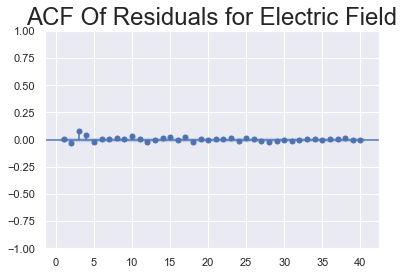

In [135]:
sgt.plot_acf(new_df_train.res_ret, zero = False, lags = 40)
plt.title("ACF Of Residuals for Electric Field",size=24)
plt.show()

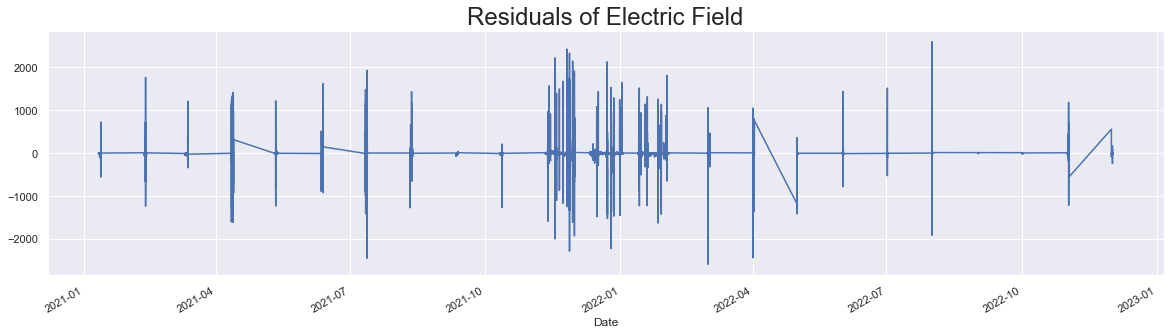

In [136]:
new_df_train.res_ret.plot(figsize=(20,5))
plt.title("Residuals of Electric Field", size=24)
plt.show()